In [10]:
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import plotly.express as px

# Dash
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

## Load data

In [11]:
# Load energy data
df_api = pd.read_csv('api_extract.csv', parse_dates=['timestamp'])
df_api.head()

,id,timestamp,duration,emissions,energy_consumed,run_id
0,"""09f00cfb-0f8c-4322-b717-fe21351af364""",2021-06-15 17:47:31.798113,29.0,0.000052,0.000123,"""731e791d-dd75-44a1-a253-b875bdc7ffbf"""
1,"""37c1e971-4818-444b-b155-93482e1e5877""",2021-06-15 17:47:01.831489,30.0,0.000044,0.000104,"""731e791d-dd75-44a1-a253-b875bdc7ffbf"""
2,"""741059bd-d13c-49a4-96ca-7bf3f90d3c90""",2021-06-15 17:46:31.790478,30.0,0.000054,0.000126,"""731e791d-dd75-44a1-a253-b875bdc7ffbf"""
3,"""364532c6-0b27-44f8-8372-c557a1ac3f62""",2021-06-15 17:46:01.797756,29.0,0.000043,0.000102,"""731e791d-dd75-44a1-a253-b875bdc7ffbf"""
4,"""032ddb31-c06f-4a87-8b95-98207e1f89ab""",2021-06-15 17:45:31.808544,30.0,0.000045,0.000106,"""731e791d-dd75-44a1-a253-b875bdc7ffbf"""


## Filter by week using slider

<AxesSubplot:>

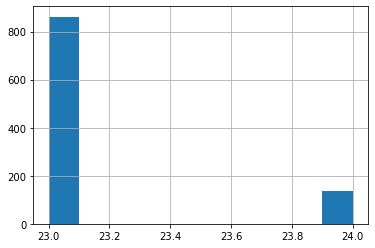

In [12]:
df_api['timestamp'].apply(lambda dt: dt.week).hist()

In [13]:
# Build week field
weeks = df_api['timestamp'].apply(lambda dt: dt.week).unique()  # 23, 24
weeks.sort()

In [ ]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Energy Consumed"),
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='week-slider',
        min=weeks.min(),
        max=weeks.max(),
        value=weeks.min(),
        marks={str(week): str(week) for week in weeks},
        step=None
    )
])


@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('week-slider', 'value'))
def update_figure(selected_week):
    filtered_df = df_api[df_api['timestamp'].apply(lambda dt: dt.week) == selected_week]
    fig = px.scatter(filtered_df, x="timestamp", y="energy_consumed")
    fig.update_layout(transition_duration=500)
    return fig

app.run_server()